In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### Extract all image data 

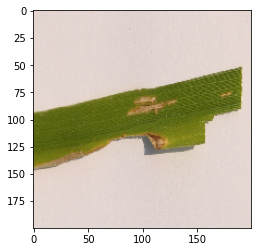

In [31]:
img = image.load_img('C:/Users/ASK/Desktop/DR/Train/Bacterial leaf blight/DSC_0365.JPG' , target_size=(200, 200))
plt.imshow(img)

In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    try:
      if(logs.get('acc')>0.95):
        print("\nReached")
        self.model.stop_training = True
    except:
      if(logs.get('accuracy')>0.95):
        print("Reached!!!")
        self.model.stop_training = True
callbacks = myCallback()

In [39]:
train_datagen = ImageDataGenerator(rescale=1/255.0)
validation_datagen = ImageDataGenerator(rescale=1/255.0)


train_generator = train_datagen.flow_from_directory(
        'C:/Users/ASK/Desktop/DR/Train/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'C:/Users/ASK/Desktop/DR/validation/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 120 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [40]:
train_generator.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [41]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [42]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  
      epochs=20,
      validation_data = validation_generator,callbacks=[callbacks])


Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 0.6590 - accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 8s 8s/step - loss: 52.2373 - accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 7s 7s/step - loss: 1.7186 - accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 8s 8s/step - loss: 5.6637 - accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 7s 7s/step - loss: 1.1525 - accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 8s 8s/step - loss: 1.1671 - accuracy: 0.3333
Epoch 7/20
1/1 [==============================] - 8s 8s/step - loss: 0.6428 - accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 6s 6s/step - loss: 0.6800 - accuracy: 0.6667
Epoch 9/20
1/1 [==============================] - 6s 6s/step - loss: 0.6552 - accuracy: 0.6667
Epoch 10/20
1/1 [==============================] - 6s 6s/step - loss: 0.6380 - accuracy: 0.6667
Epoch 11/20
1/1 [=============================

In [52]:
dir_path = "C:/Users/ASK/Desktop/DR/New"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("You ara not happy")
    else:
        print("you are happy")


PermissionError: [Errno 13] Permission denied: 'C:/Users/ASK/Desktop/DR/New//Bacterial leaf blight'